<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.HOURLY

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split(), key=True)
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,A,5093,X,3
2019-01-01 01:00:00,1546304400,A,3534,Y,3
2019-01-01 02:00:00,1546308000,B,2449,Z,3
2019-01-01 03:00:00,1546311600,A,9697,X,3
2019-01-01 04:00:00,1546315200,B,3332,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,1003,Z,3
2019-01-11 21:00:00,1547240400,C,7494,X,3
2019-01-11 22:00:00,1547244000,D,5541,Y,3
2019-01-11 23:00:00,1547247600,D,482,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

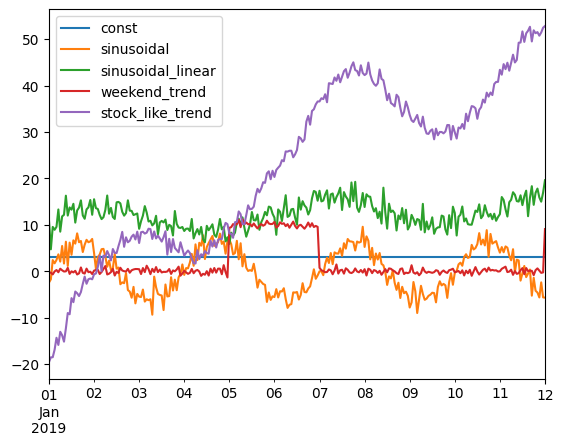

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,5093,X,3,-2.414204,10.994986,-0.270858,-19.538853
2019-01-01 01:00:00,1546304400,A,3534,Y,3,-1.717646,4.741960,-0.269441,-18.520833
2019-01-01 02:00:00,1546308000,B,2449,Z,3,2.422622,9.567542,-0.665065,-18.494181
2019-01-01 03:00:00,1546311600,A,9697,X,3,1.730201,8.951100,-0.018600,-16.872772
2019-01-01 04:00:00,1546315200,B,3332,Y,3,2.456059,9.594057,0.281888,-14.301540
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,1003,Z,3,-4.559549,17.820683,0.634424,51.519317
2019-01-11 21:00:00,1547240400,C,7494,X,3,-5.619260,15.915601,0.151636,50.749495
2019-01-11 22:00:00,1547244000,D,5541,Y,3,-2.376497,15.005005,-0.330918,51.440482
2019-01-11 23:00:00,1547247600,D,482,Z,3,-5.609837,16.952040,-0.228514,52.465006


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,X,3,10.994986,-0.270858,-19.538853
2019-01-01 01:00:00,1546304400,A,Y,3,4.741960,-0.269441,-18.520833
2019-01-01 02:00:00,1546308000,B,Z,3,9.567542,-0.665065,-18.494181
2019-01-01 03:00:00,1546311600,A,X,3,8.951100,-0.018600,-16.872772
2019-01-01 04:00:00,1546315200,B,Y,3,9.594057,0.281888,-14.301540
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,Z,3,17.820683,0.634424,51.519317
2019-01-11 21:00:00,1547240400,C,X,3,15.915601,0.151636,50.749495
2019-01-11 22:00:00,1547244000,D,Y,3,15.005005,-0.330918,51.440482
2019-01-11 23:00:00,1547247600,D,Z,3,16.952040,-0.228514,52.465006


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,Y,3,12.116469,0.390574,-20.613119
2019-01-01 01:00:00,1546304400,B,Z,3,10.352559,0.007952,-18.675183
2019-01-01 02:00:00,1546308000,B,X,3,11.112065,-0.316227,-17.624435
2019-01-01 03:00:00,1546311600,A,Y,3,11.662535,0.001680,-17.242578
2019-01-01 04:00:00,1546315200,D,Z,3,13.656028,-0.310562,-17.388439
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,C,Y,3,14.220288,-0.725663,60.057216
2019-01-11 22:00:00,1547244000,B,Z,3,19.218333,-0.052752,59.986691
2019-01-11 23:00:00,1547247600,A,X,3,19.119107,0.036761,60.148545
2019-01-12 00:00:00,1547251200,D,Y,3,15.998016,9.970464,61.221875
